<a href="https://colab.research.google.com/github/Emjeeey/ITBA-3205_HumanTraffickingINDIA/blob/main/404_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Emjeeey/ITBA-3205_ImpactClimateChange.git


Cloning into 'ITBA-3205_ImpactClimateChange'...
remote: Enumerating objects: 232, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 232 (delta 47), reused 0 (delta 0), pack-reused 140
Receiving objects: 100% (232/232), 6.14 MiB | 12.37 MiB/s, done.
Resolving deltas: 100% (107/107), done.


In [ ]:
!pip install seaborn --upgrade

In [ ]:
!pip install matplotlib --upgrade

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#understanding the data

In [ ]:
data = '/content/ITBA-3205_ImpactClimateChange/Human Trafficking dataset/2019_victims_trafficked.xlsx'
VictimsTrafficked2019 = pd.read_excel(data)


In [ ]:
VictimsTrafficked2019.head()

,State/UT,Male,Female,Total_victims_trafficked,Age Group,region type
0,Andhra Pradesh,0,18,18,Below 18,state
1,Arunachal Pradesh,1,3,4,Below 18,state
2,Assam,24,56,80,Below 18,state
3,Bihar,261,33,294,Below 18,state
4,Chhattisgarh,52,61,113,Below 18,state


In [ ]:
VictimsTrafficked2019.tail()

,State/UT,Male,Female,Total_victims_trafficked,Age Group,region type
67,D&N Haveli,0,0,0,Above 18,union territory
68,Daman & Diu,0,0,0,Above 18,union territory
69,Delhi UT,42,30,72,Above 18,union territory
70,Lakshadweep,0,0,0,Above 18,union territory
71,Puducherry,0,5,5,Above 18,union territory


In [ ]:
VictimsTrafficked2019.shape

In [ ]:
VictimsTrafficked2019.columns

In [ ]:
VictimsTrafficked2019.nunique()

In [ ]:
VictimsTrafficked2019.isnull().sum()

In [ ]:
#cleaning the data

In [ ]:
#assigning filters  for 0 values

In [ ]:
df= pd.DataFrame(VictimsTrafficked2019)

In [ ]:
filt1 = (df['Male'] == 0 ) & (df['Female'] == 0 ) & (df['Total_victims_trafficked'] == 0 )

In [ ]:
df.loc[filt1]

In [ ]:
df.drop((df.index[df['Male'] == 0]) & (df.index[df['Female'] == 0]) & (df.index[df['Total_victims_trafficked'] == 0])  , inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  """Entry point for launching an IPython kernel.


In [ ]:
CleanVT = df.drop(['State/UT','region type' ], axis=1)

In [ ]:
#CleanVT is variable for the cleaned data for victims in 2019

In [ ]:
CleanVT

In [ ]:
sns.set_style(style="darkgrid")

Text(0.5, 1.0, 'Female Victims according to their Age ')

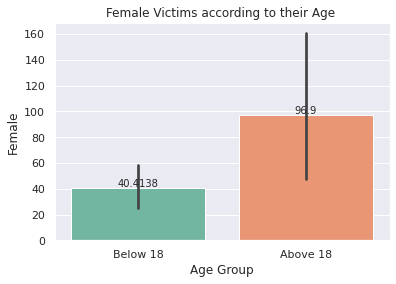

In [ ]:
sns.set_palette('Set2')
ax= sns.barplot(x='Age Group', y= 'Female', data= CleanVT)
ax.bar_label(ax.containers[0])

plt.title("Female Victims according to their Age ")


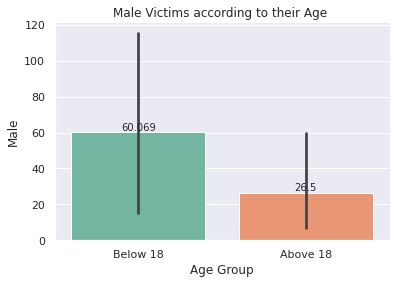

In [ ]:
sns.set_palette('Set2')
ax= sns.barplot(x='Age Group', y= 'Male', data= CleanVT)
ax.bar_label(ax.containers[0])
plt.title("Male Victims according to their Age ")
sns.despine()

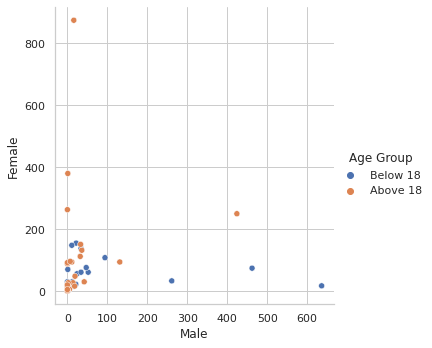

In [ ]:
sns.relplot(x="Male", y="Female", hue="Age Group", data=CleanVT)

In [ ]:
#dataset for Purpose of trafficking

In [ ]:
data = '/content/ITBA-3205_ImpactClimateChange/Human Trafficking dataset/2019_trafficking_purpose.xlsx'
TraffPurpose2019 = pd.read_excel(data)


In [ ]:
TraffPurpose2019.tail()

In [ ]:
TraffPurpose2019.shape

(5,)

In [ ]:
TraffPurpose2019.columns

Index(['State/UT ', 'Forced Labour ', 'Sexual Exploitation for Prostitution ',
       'Domestic Servitude ', 'Forced Marriage ', 'Petty Crimes ',
       'Child Pornography ', 'Begging ', 'Drug Peddling ',
       'Removal of Organs ', 'Other reasons ', 'Total Persons ',
       'region type'],
      dtype='object')

In [ ]:
TraffPurpose2019.isnull().sum()

State/UT                                 0
Forced Labour                            0
Sexual Exploitation for Prostitution     0
Domestic Servitude                       0
Forced Marriage                          0
Petty Crimes                             0
Child Pornography                        0
Begging                                  0
Drug Peddling                            0
Removal of Organs                        0
Other reasons                            0
Total Persons                            0
region type                              0
dtype: int64

In [ ]:
#cleaning the data and dropping the columns that have 0 values

In [ ]:
df= pd.DataFrame(TraffPurpose2019)

In [ ]:
TraffPurpose2019.drop(['Child Pornography ', 'Drug Peddling ', 'region type'], axis = 1)

In [ ]:
sns.set_style(style="darkgrid")

In [ ]:
Top5= TraffPurpose2019.nlargest(5,'Total Persons ')

In [ ]:
#x= Top5['State/UT ']
#y= Top5['Total Persons ']


In [ ]:
#plt.bar(x,y)
#plt.xticks(rotation=90,fontsize=12)
#plt.title("Top 5 State with the most number of victims")
#plt.ylabel("Total Persons")
#plt.xlabel("State/UT")
#plt.show()

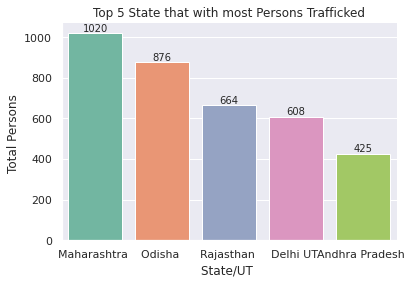

In [ ]:
sns.set_palette('Set2')
ax= sns.barplot(x='State/UT ', y= 'Total Persons ',estimator=sum, ci=None, data= Top5)
ax.bar_label(ax.containers[0])
plt.title("Top 5 State that with most Persons Trafficked")
sns.despine()